In [423]:
import random
import math
from matplotlib import pyplot as plt 
import numpy as np

In [424]:
class ParamsOptimizer:
    x1 = 0
    x2 = 0
    x3 = 0
    class_list = ["music", "speach", "silence"]
    class_params = {el: {"freq_b": [1750,], "freq_t": [8500,], "dur": [20,], "reward": 0, "freq_b_grad": 0, "freq_t_grad": 0, "dur_grad": 0, "freq_b_step": 512, "freq_t_step": 512, "dur_step": 10, "direction": 1, "param_n": 0} for el in class_list} 


    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if not params["reward"]:
            params["reward"] = new_reward
            params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
            return
            
        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = -(new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = -(new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(params["dur"][-1] + params["dur_step"])
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = -(new_reward - params["reward"])
            params["dur"].pop()

            print(params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"])

            # params["freq_b"].append(params["freq_b"][-1] + 50*params["freq_b_grad"])
            # params["freq_t"].append(params["freq_t"][-1] + 50*params["freq_t_grad"])
            # params["dur"].append(params["dur"][-1] + 10*params["dur_grad"])

            params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"] * np.sign(params["freq_b_grad"]))
            params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"] * np.sign(params["freq_t_grad"]))
            params["dur"].append(params["dur"][-1] + params["dur_step"] * np.sign(params["dur_grad"]))

            print(params["freq_b"][-1], params["freq_t"][-1], params["dur"][-1])
            
            if params["freq_b_grad"] < 0:
                params["freq_b_step"] /= 2
            if params["freq_t_grad"] < 0:
                params["freq_t_step"] /= 2
            if params["dur_grad"] < 0:
                params["dur_step"] /= 2

            params["reward"] = 0

        params["param_n"] = params["param_n"] + 1
    

        
        # grad = -(new_reward - params["reward"][-1])
        # params["reward"].append(new_reward)

        # grad_sign = 1 if grad > 0 else -1
        # if grad_sign == -1:
        #     params["direction"] = -params["direction"]
        #     if params["param_n"] % 3 == 0:
        #         params["freq_b_step"] /= 2
        #     if params["param_n"] % 3 == 1:
        #         params["freq_t_step"] /= 2
        #     if params["param_n"] % 3 == 2:
        #         params["dur_step"] /= 2
        
        # if params["param_n"] % 3 == 2:
        #     params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
        # elif params["param_n"] % 3 == 0:
        #     params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        # elif params["param_n"] % 3 == 1:
        #     params["dur"].append(params["dur"][-1] + params["dur_step"])

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = reward or math.sqrt((params["freq_b"][-1]-self.x1)**2+(params["freq_t"][-1]-self.x2)**2+(params["dur"][-1]-self.x3)**2)
        print(reward)
        self.make_step(sound_type, reward)
        
        return reward
  

In [425]:

result = {}
optimizer = ParamsOptimizer()
optimizer.x1 = 4000
optimizer.x2 = 17000
optimizer.x3 = 120
for i in range(212):
    optimizer.analyze("music")
    # if i % 9 == 2:
        # optimizer.class_params["music"]["param_n"] = optimizer.class_params["music"]["param_n"] + 1
    optimizer.x1 = 4000 + random.random()*500
    optimizer.x2 = 17000 + random.random()*1000
    optimizer.x3 = 120 + random.random()*10
    if i % 27 == 2:
        optimizer.class_params["music"]["freq_b_step"] = 512
        optimizer.class_params["music"]["freq_t_step"] = 512
        optimizer.class_params["music"]["dur_step"] = 10

8793.321329281673
8855.40655001069
8928.523757010207
9128.235644622015
-62.08522072901724 -135.20242772853453 -334.914315340342
1238.0 7988.0 10.0
10142.746473707884
9627.699995540168
9920.727775617286
10259.559077162952
515.0464781677165 222.01869809059826 -116.8126034550678
1494.0 8244.0 5.0
10071.305434878084
9520.375195266257
9675.439565105711
9868.501615503725
550.9302396118273 395.8658697723731 202.8038193743596
1750.0 8500.0 7.5
9549.010891604312
9008.02591354667
9109.511227639903
8993.100569175345
540.9849780576424 439.4996639644087 555.9103224289665
2006.0 8756.0 10.0
8761.802727008298
8902.40144617925
8892.864820874038
9173.763211465934
-140.59871917095188 -131.06209386573937 -411.9604844576352
1750.0 8500.0 7.5
9424.485321716522
9026.414734056421
9346.779177132812
9405.15737120089
398.0705876601005 77.70614458370983 19.327950515631528
1878.0 8628.0 8.75
9073.786794188944
9438.883561698323
9409.058975403266
8882.3347628114
-365.0967675093798 -335.2721812143227 191.45203137754

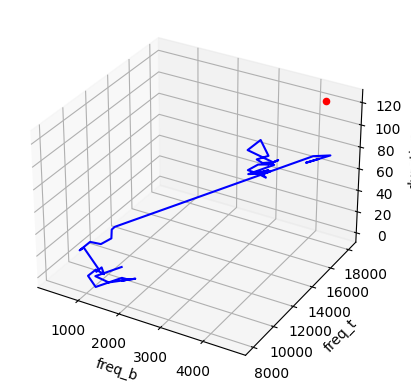

In [426]:
def draw(x1_hist, x2_hist, x3_hist, x1, x2, x3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(x1_hist, x2_hist, x3_hist, 'b')
    ax.set_xlabel('freq_b')
    ax.set_ylabel('freq_t')
    ax.set_zlabel('duration')
    
    ax.scatter(x1, x2, x3, c='red')
    return plt.show()

draw(optimizer.class_params["music"]["freq_b"][:64], optimizer.class_params["music"]["freq_t"][:64], optimizer.class_params["music"]["dur"][:64], optimizer.x1, optimizer.x2, optimizer.x3)

In [ ]:
class ParamsOptimizer:
    x1 = 0
    x2 = 0
    x3 = 0
    class_list = ["music", "speach", "silence"]
    class_params = {el: {"freq_b": [1750,], "freq_t": [8500,], "dur": [20,], "reward": 0, "freq_b_grad": 0, "freq_t_grad": 0, "dur_grad": 0, "freq_b_step": 512, "freq_t_step": 512, "dur_step": 10, "direction": 1, "param_n": 0} for el in class_list} 


    def make_step(self, sound_type, new_reward):
        params = self.class_params[sound_type]

        if not params["reward"]:
            params["reward"] = new_reward
            params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
            return
            
        if params["param_n"] % 3 == 0:
            params["freq_b_grad"] = -(new_reward - params["reward"])
            params["freq_b"].pop()
            params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        elif params["param_n"] % 3 == 1:
            params["freq_t_grad"] = -(new_reward - params["reward"])
            params["freq_t"].pop()
            params["dur"].append(params["dur"][-1] + params["dur_step"])
        elif params["param_n"] % 3 == 2:
            params["dur_grad"] = -(new_reward - params["reward"])
            params["dur"].pop()

            print(params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"])

            direction = np.argmax([params["freq_b_grad"], params["freq_t_grad"], params["dur_grad"]])
            # params["freq_b"].append(params["freq_b"][-1] + 50*params["freq_b_grad"])
            # params["freq_t"].append(params["freq_t"][-1] + 50*params["freq_t_grad"])
            # params["dur"].append(params["dur"][-1] + 10*params["dur_grad"])

            if direction == 0:
                params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"] * np.sign(params["freq_b_grad"]))
                params["freq_t"].append(params["freq_t"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_b_grad"] < 0:
                    params["freq_b_step"] /= 2
            elif direction == 1:
                params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"] * np.sign(params["freq_t_grad"]))
                params["freq_b"].append(params["freq_b"][-1])
                params["dur"].append(params["dur"][-1])
                if params["freq_t_grad"] < 0:
                    params["freq_t_step"] /= 2
            elif direction == 2:
                params["dur"].append(params["dur"][-1] + params["dur_step"] * np.sign(params["dur_grad"]))
                params["freq_t"].append(params["freq_t"][-1])
                params["freq_b"].append(params["freq_b"][-1])
                if params["dur_grad"] < 0:
                    params["dur_step"] /= 2

            print(params["freq_b"][-1], params["freq_t"][-1], params["dur"][-1])
            

            params["reward"] = 0

        params["param_n"] = params["param_n"] + 1
    

        
        # grad = -(new_reward - params["reward"][-1])
        # params["reward"].append(new_reward)

        # grad_sign = 1 if grad > 0 else -1
        # if grad_sign == -1:
        #     params["direction"] = -params["direction"]
        #     if params["param_n"] % 3 == 0:
        #         params["freq_b_step"] /= 2
        #     if params["param_n"] % 3 == 1:
        #         params["freq_t_step"] /= 2
        #     if params["param_n"] % 3 == 2:
        #         params["dur_step"] /= 2
        
        # if params["param_n"] % 3 == 2:
        #     params["freq_b"].append(params["freq_b"][-1] + params["freq_b_step"])
        # elif params["param_n"] % 3 == 0:
        #     params["freq_t"].append(params["freq_t"][-1] + params["freq_t_step"])
        # elif params["param_n"] % 3 == 1:
        #     params["dur"].append(params["dur"][-1] + params["dur_step"])

    def analyze(self, sound_type, reward=None):
        params = self.class_params[sound_type]
        reward = reward or math.sqrt((params["freq_b"][-1]-self.x1)**2+(params["freq_t"][-1]-self.x2)**2+(params["dur"][-1]-self.x3)**2)

        self.make_step(sound_type, reward)  
        return reward
  